In [1]:
#import useful libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import general_statistics as stats
import figures as figs
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
from scipy import stats as sstats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
cmap = cm.jet
import math
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import cross_val_score
import random
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
input_directory = os.environ['PROJECT_DIR'] + 'neural_analysis/data/mean_representational_distance/'

figure_path = os.environ['PROJECT_DIR'] +'neural_analysis/figures/mean_representational_distance/'

In [3]:
mouse_vector = [56165, 32363, 32364, 32365, 411857, 411857, 401714]
conditions_vector = ['RANDOM', 'OVERLAPPING','STABLE']
sessions_random = [4,1,0,2,2,6,2] # total = 6
sessions_overlapping = [1,2,1,3,3,5,0] # total = 6
sessions_stable = [2,0,2,0,1,4,1] # total = 5 (4 and 1/2)

In [4]:
random_list_corners = []
overlapping_list_corners = []
stable_list_corners = []

random_list_corners_trial = []
overlapping_list_corners_trial = []
stable_list_corners_trial = []

random_list_object_corners = []
overlapping_list_object_corners = []
stable_list_object_corners = []

random_list_object_corners_trial = []
overlapping_list_object_corners_trial = []
stable_list_object_corners_trial = []

random_list_task = []
overlapping_list_task = []
stable_list_task = []


random_list_task_trial = []
overlapping_list_task_trial = []
stable_list_task_trial = []


counter_random = 0
counter_stable = 0
counter_overlapping = 0

for day in range(4):
    for i in [0,1,2,3,4,5,6]:
        mouse = mouse_vector[i]
        #### check session_random
        session = sessions_random[i]
        if session:
            if day == 0:
                counter_random += 1
            file_name = input_directory + 'nav_distance_day_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                random_list_corners.append(distance)
            file_name = input_directory + 'exp_distance_day_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                random_list_object_corners.append(distance)
            file_name = input_directory + 'task_distance_day_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                random_list_task.append(distance)                
                
        session = sessions_overlapping[i]
        if session:
            if day == 0:
                counter_overlapping += 1
            file_name = input_directory + 'nav_distance_day_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                overlapping_list_corners.append(distance)
            file_name = input_directory + 'exp_distance_day_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                overlapping_list_object_corners.append(distance)
            file_name = input_directory + 'task_distance_day_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                overlapping_list_task.append(distance)      
                
        session = sessions_stable[i]
        if session:
            if day == 0:
                counter_stable += 1
            file_name = input_directory + 'nav_distance_day_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                stable_list_corners.append(distance)
            file_name = input_directory + 'exp_distance_day_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                stable_list_object_corners.append(distance)
            file_name = input_directory + 'task_distance_day_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                stable_list_task.append(distance)      

In [23]:
for trial in range(20):
    for i in range(len(mouse_vector)):
        mouse = mouse_vector[i]
        #### check session_random
        session = sessions_random[i]
        if session:
            file_name = input_directory + 'nav_distance_trial_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                random_list_corners_trial.append(distance)     
            file_name = input_directory + 'exp_distance_trial_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                random_list_object_corners_trial.append(distance)   
            file_name = input_directory + 'task_distance_trial_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                random_list_task_trial.append(distance)    
                
        session = sessions_overlapping[i]
        if session:
            file_name = input_directory + 'nav_distance_trial_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                overlapping_list_corners_trial.append(distance)
            file_name = input_directory + 'exp_distance_trial_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                overlapping_list_object_corners_trial.append(distance)  
            file_name = input_directory + 'task_distance_trial_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                overlapping_list_task_trial.append(distance)  

        session = sessions_stable[i]
        if session:
            file_name = input_directory + 'nav_distance_trial_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                stable_list_corners_trial.append(distance)
            file_name = input_directory + 'exp_distance_trial_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                stable_list_object_corners_trial.append(distance)  
            file_name = input_directory + 'task_distance_trial_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_trial_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                distance = np.load(file_name)
                stable_list_task_trial.append(distance)       

In [24]:
len(random_list_corners)

20

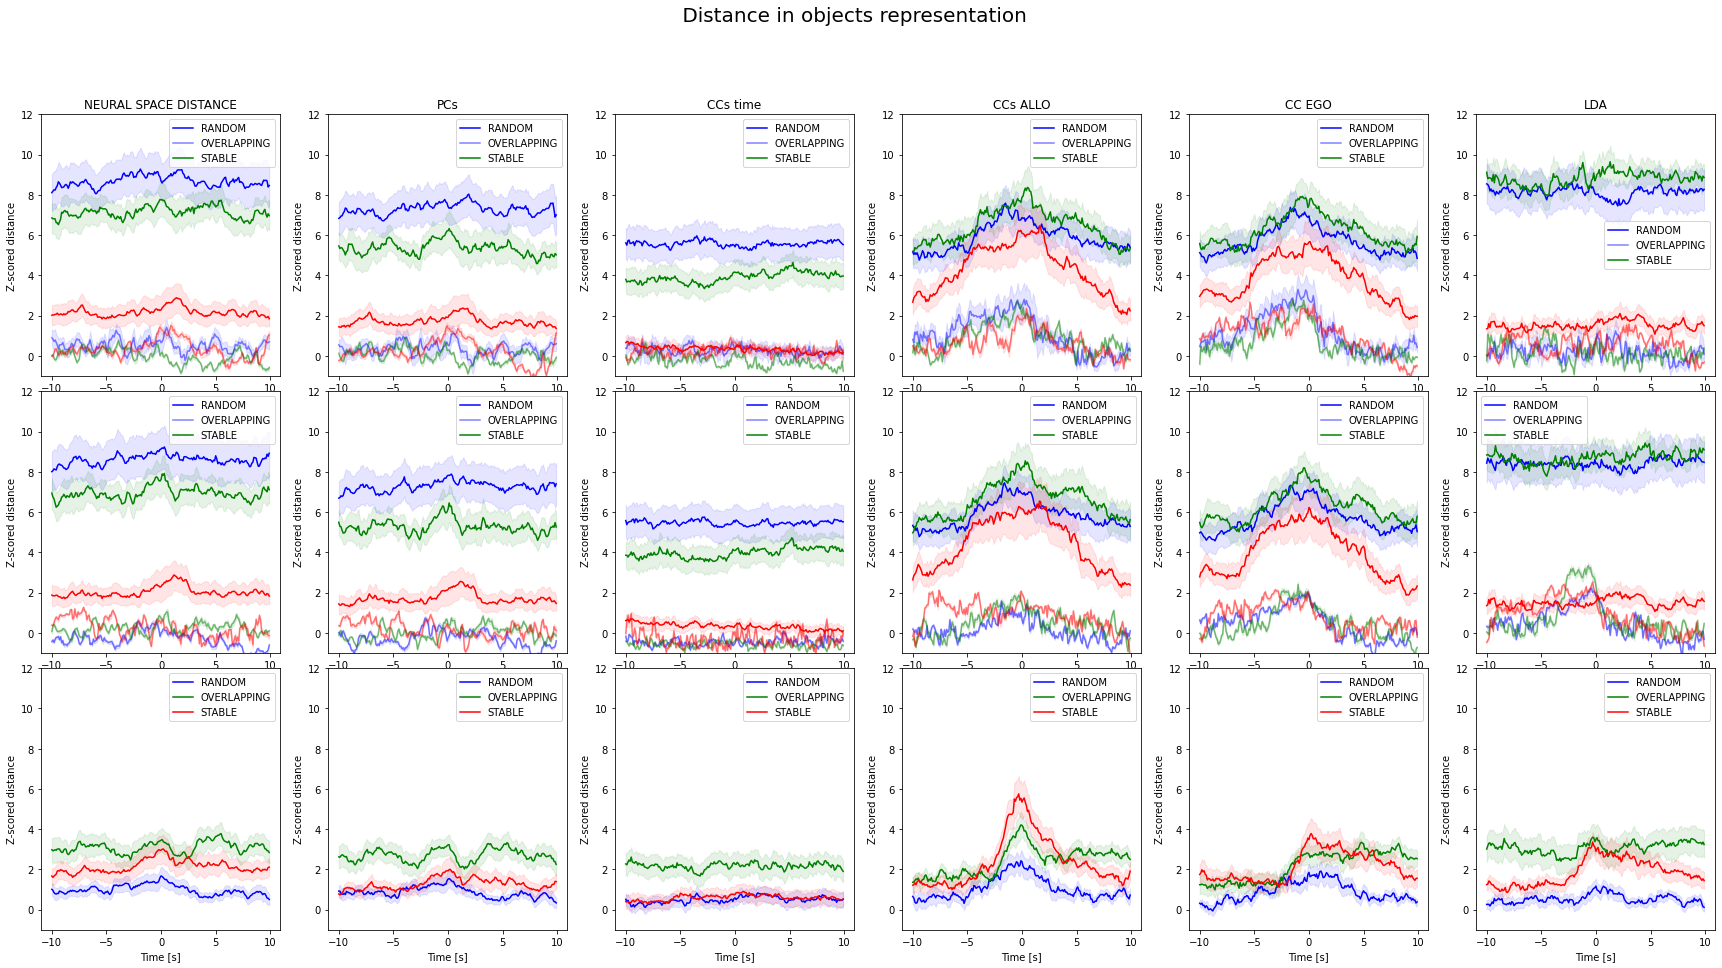

In [25]:
figure = plt.figure()
gs = plt.GridSpec(9,6)
label = ['RANDOM','OVERLAPPING','STABLE']
time = np.arange(-100,100)/10

### neural

titles = ['NEURAL SPACE DISTANCE', 'PCs', 'CCs time','CCs ALLO','CC EGO', 'LDA']

random_list1 = []
random_list2 = []
random_list3 = []

random_list1_trial = []
random_list2_trial = []

stable_list1 = []
stable_list2 = []
stable_list3 = []

stable_list1_trial = []
stable_list2_trial = []

overlapping_list1 = []
overlapping_list2 = []
overlapping_list3 = []

overlapping_list1_trial = []
overlapping_list2_trial = []

for i in range(6):

    ax0 = figure.add_subplot(gs[0:3,i])
    ax0.set_title(titles[i])
    random_mean = np.nanmean(random_list_corners,0)[i,:]
    random_std =  np.nanstd(random_list_corners,0)[i,:]/np.sqrt(len(random_list_corners))
    ax0.plot(time,random_mean,'b')
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'b', facecolor = 'b')
    random_list1.append(random_mean)
    ax0.set_ylim([-1,12])
    
    random_mean = np.nanmean(random_list_corners_trial,0)[i,:]
    random_std =  np.nanstd(random_list_corners_trial,0)[i,:]/np.sqrt(len(random_list_corners_trial[i]))
    ax0.plot(time,random_mean,'b', alpha = 0.5)
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'b', facecolor = 'b')
    random_list1_trial.append(random_mean)
    
    overlapping_mean = np.nanmean(overlapping_list_corners,0)[i,:]
    overlapping_std =  np.nanstd(overlapping_list_corners,0)[i,:]/np.sqrt(len(overlapping_list_corners))
    ax0.plot(time,overlapping_mean ,'g')
    ax0.fill_between(time,overlapping_mean -overlapping_std,overlapping_mean +overlapping_std,alpha = 0.1, edgecolor = 'g', facecolor = 'g')
    overlapping_list1.append(overlapping_mean)

    overlapping_mean = np.nanmean(overlapping_list_corners_trial,0)[i,:]
    overlapping_std =  np.nanstd(overlapping_list_corners_trial,0)[i,:]/np.sqrt(len(overlapping_list_corners_trial))
    ax0.plot(time,overlapping_mean ,'g',alpha = 0.5)
    ax0.fill_between(time,overlapping_mean -overlapping_std,overlapping_mean +overlapping_std,alpha = 0.1, edgecolor = 'g', facecolor = 'g')
    overlapping_list1_trial.append(overlapping_mean)
    
    stable_mean = np.nanmean(stable_list_corners,0)[i,:]
    stable_std =  np.nanstd(stable_list_corners,0)[i,:]/np.sqrt(len(stable_list_corners))
    ax0.plot(time,stable_mean,'r')
    ax0.fill_between(time,stable_mean-stable_std,stable_mean+stable_std,alpha = 0.1, edgecolor = 'r', facecolor = 'r')
    stable_list1.append(stable_mean)
    
    stable_mean = np.nanmean(stable_list_corners_trial,0)[i,:]
    stable_std =  np.nanstd(stable_list_corners_trial,0)[i,:]/np.sqrt(len(stable_list_corners_trial))
    ax0.plot(time,stable_mean,'r',alpha = 0.5)
    ax0.fill_between(time,stable_mean-stable_std,stable_mean+stable_std,alpha = 0.1, edgecolor = 'r', facecolor = 'r')
    stable_list1_trial.append(stable_mean)
    ax0.set_ylabel('Z-scored distance')
    ax0.set_xlabel('Time [s]')
    ax0.legend(label)
    
    
    ax0 = figure.add_subplot(gs[3:6,i])
    ax0.set_ylim([-1,12])
    random_mean = np.nanmean(random_list_object_corners,0)[i,:]
    random_std =  np.nanstd(random_list_object_corners,0)[i,:]/np.sqrt(len(random_list_object_corners))
    ax0.plot(time,random_mean,'b')
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'b', facecolor = 'b')
    random_list2.append(random_mean)
    
    random_mean = np.nanmean(random_list_object_corners_trial,0)[i,:]
    random_std =  np.nanstd(random_list_object_corners_trial,0)[i,:]/np.sqrt(len(random_list_object_corners_trial))
    ax0.plot(time,random_mean,'b',alpha = 0.5)
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'b', facecolor = 'b')
    random_list2_trial.append(random_mean)
    
    overlapping_mean = np.nanmean(overlapping_list_object_corners,0)[i,:]
    overlapping_std =  np.nanstd(overlapping_list_object_corners,0)[i,:]/np.sqrt(len(overlapping_list_object_corners))
    ax0.plot(time,overlapping_mean ,'g')
    ax0.fill_between(time,overlapping_mean -overlapping_std,overlapping_mean +overlapping_std,alpha = 0.1, edgecolor = 'g', facecolor = 'g')
    overlapping_list2.append(overlapping_mean)

    overlapping_mean = np.nanmean(overlapping_list_object_corners_trial,0)[i,:]
    overlapping_std =  np.nanstd(overlapping_list_object_corners_trial,0)[i,:]/np.sqrt(len(overlapping_list_object_corners_trial))
    ax0.plot(time,overlapping_mean ,'g',alpha = 0.5)
    ax0.fill_between(time,overlapping_mean -overlapping_std,overlapping_mean +overlapping_std,alpha = 0.1, edgecolor = 'g', facecolor = 'g')
    overlapping_list2_trial.append(overlapping_mean)
    
    stable_mean = np.nanmean(stable_list_object_corners,0)[i,:]
    stable_std =  np.nanstd(stable_list_object_corners,0)[i,:]/np.sqrt(len(stable_list_object_corners))
    ax0.plot(time,stable_mean,'r')
    ax0.fill_between(time,stable_mean-stable_std,stable_mean+stable_std,alpha = 0.1, edgecolor = 'r', facecolor = 'r')
    stable_list2.append(stable_mean)

    stable_mean = np.nanmean(stable_list_object_corners_trial,0)[i,:]
    stable_std =  np.nanstd(stable_list_object_corners_trial,0)[i,:]/np.sqrt(len(stable_list_object_corners_trial))
    ax0.plot(time,stable_mean,'r',alpha = 0.5)
    ax0.fill_between(time,stable_mean-stable_std,stable_mean+stable_std,alpha = 0.1, edgecolor = 'r', facecolor = 'r')
    stable_list2_trial.append(stable_mean)
       
    ax0.set_ylabel('Z-scored distance')
    ax0.set_xlabel('Time [s]')
    ax0.legend(label)


    ax0 = figure.add_subplot(gs[6:9,i])
    ax0.set_ylim([-1,12])
    random_mean = np.nanmean(random_list_task,0)[i,:]
    random_std =  np.nanstd(random_list_task,0)[i,:]/np.sqrt(len(random_list_task))
    ax0.plot(time,random_mean,'b')
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'b', facecolor = 'b')
    random_list3.append(random_mean)
    
    overlapping_mean = np.nanmean(overlapping_list_task,0)[i,:]
    overlapping_std =  np.nanstd(overlapping_list_task,0)[i,:]/np.sqrt(len(overlapping_list_task))
    ax0.plot(time,overlapping_mean ,'g')
    ax0.fill_between(time,overlapping_mean -overlapping_std,overlapping_mean +overlapping_std,alpha = 0.1, edgecolor = 'g', facecolor = 'g')
    overlapping_list3.append(overlapping_mean)

    stable_mean = np.nanmean(stable_list_task,0)[i,:]
    stable_std =  np.nanstd(stable_list_task,0)[i,:]/np.sqrt(len(stable_list_task))
    ax0.plot(time,stable_mean,'r')
    ax0.fill_between(time,stable_mean-stable_std,stable_mean+stable_std,alpha = 0.1, edgecolor = 'r', facecolor = 'r')
    stable_list3.append(stable_mean)
    
    ax0.set_ylabel('Z-scored distance')
    ax0.set_xlabel('Time [s]')
    ax0.legend(label)

    
figure.set_size_inches([30,15])

figure.suptitle(' Distance in objects representation', fontsize = 20)
figure_name = figure_path + 'mean_representational_distance.png'
figure.patch.set_facecolor('white')

figure.savefig(figure_name)

In [28]:

label = ['RANDOM','OVERLAPPING','STABLE']
time = np.arange(-100,100)/10

### neural

titles = ['NEURAL SPACE DISTANCE', 'PCs', 'CCs time','CCs ALLO','CC EGO', 'LDA']

random_list1 = []
random_list2 = []
random_list3 = []

random_list1_trial = []
random_list2_trial = []

stable_list1 = []
stable_list2 = []
stable_list3 = []

stable_list1_trial = []
stable_list2_trial = []

overlapping_list1 = []
overlapping_list2 = []
overlapping_list3 = []

overlapping_list1_trial = []
overlapping_list2_trial = []

for i in range(6):

    ax0 = figure.add_subplot(gs[0:3,i])
    ax0.set_title(titles[i])
    random_mean = np.nanmean(random_list_corners,axis = 2)[:,i]
    random_std =  np.nanstd(random_list_corners,2)[:,i]/np.sqrt(len(random_list_corners))
    random_list1.append(random_mean)
    
    random_mean = np.nanmean(random_list_corners_trial,2)[:,i]
    random_std =  np.nanstd(random_list_corners_trial,2)[:,i]/np.sqrt(len(random_list_corners_trial))
    random_list1_trial.append(random_mean)
    
    overlapping_mean = np.nanmean(overlapping_list_corners,2)[:,i]
    overlapping_std =  np.nanstd(overlapping_list_corners,2)[:,i]/np.sqrt(len(overlapping_list_corners))
    overlapping_list1.append(overlapping_mean)

    overlapping_mean = np.nanmean(overlapping_list_corners_trial,2)[:,i]
    overlapping_std =  np.nanstd(overlapping_list_corners_trial,2)[:,i]/np.sqrt(len(overlapping_list_corners_trial))
    overlapping_list1_trial.append(overlapping_mean)
    
    stable_mean = np.nanmean(stable_list_corners,2)[:,i]
    stable_std =  np.nanstd(stable_list_corners,2)[:,i]/np.sqrt(len(stable_list_corners))
    stable_list1.append(stable_mean)
    
    stable_mean = np.nanmean(stable_list_corners_trial,2)[:,i]
    stable_std =  np.nanstd(stable_list_corners_trial,2)[:,2]/np.sqrt(len(stable_list_corners_trial))
    stable_list1_trial.append(stable_mean)

    
    random_mean = np.nanmean(random_list_object_corners,2)[:,i]
    random_std =  np.nanstd(random_list_object_corners,2)[:,i]/np.sqrt(len(random_list_object_corners))
    random_list2.append(random_mean)
    
    random_mean = np.nanmean(random_list_object_corners_trial,2)[:,i]
    random_std =  np.nanstd(random_list_object_corners_trial,2)[:,i]/np.sqrt(len(random_list_object_corners_trial))
    random_list2_trial.append(random_mean)
    
    overlapping_mean = np.nanmean(overlapping_list_object_corners,2)[:,i]
    overlapping_std =  np.nanstd(overlapping_list_object_corners,2)[:,i]/np.sqrt(len(overlapping_list_object_corners))
    overlapping_list2.append(overlapping_mean)

    overlapping_mean = np.nanmean(overlapping_list_object_corners_trial,2)[:,i]
    overlapping_std =  np.nanstd(overlapping_list_object_corners_trial,2)[:,i]/np.sqrt(len(overlapping_list_object_corners_trial))
    overlapping_list2_trial.append(overlapping_mean)
    
    stable_mean = np.nanmean(stable_list_object_corners,2)[:,i]
    stable_std =  np.nanstd(stable_list_object_corners,2)[:,i]/np.sqrt(len(stable_list_object_corners))
    stable_list2.append(stable_mean)

    stable_mean = np.nanmean(stable_list_object_corners_trial,2)[:,i]
    stable_std =  np.nanstd(stable_list_object_corners_trial,2)[:,i]/np.sqrt(len(stable_list_object_corners_trial))
    stable_list2_trial.append(stable_mean)


    random_mean = np.nanmean(random_list_task,2)[:,i]
    random_std =  np.nanstd(random_list_task,2)[:,i]/np.sqrt(len(random_list_task))
    random_list3.append(random_mean)
    
    overlapping_mean = np.nanmean(overlapping_list_task,2)[:,i]
    overlapping_std =  np.nanstd(overlapping_list_task,2)[:,i]/np.sqrt(len(overlapping_list_task))
    overlapping_list3.append(overlapping_mean)

    stable_mean = np.nanmean(stable_list_task,2)[:,i]
    stable_std =  np.nanstd(stable_list_task,2)[:,i]/np.sqrt(len(stable_list_task))
    stable_list3.append(stable_mean)
    

# figure.suptitle(' Distance in objects representation', fontsize = 20)
# figure_name = figure_path + 'mean_representational_distance.png'
# figure.patch.set_facecolor('white')

# figure.savefig(figure_name)

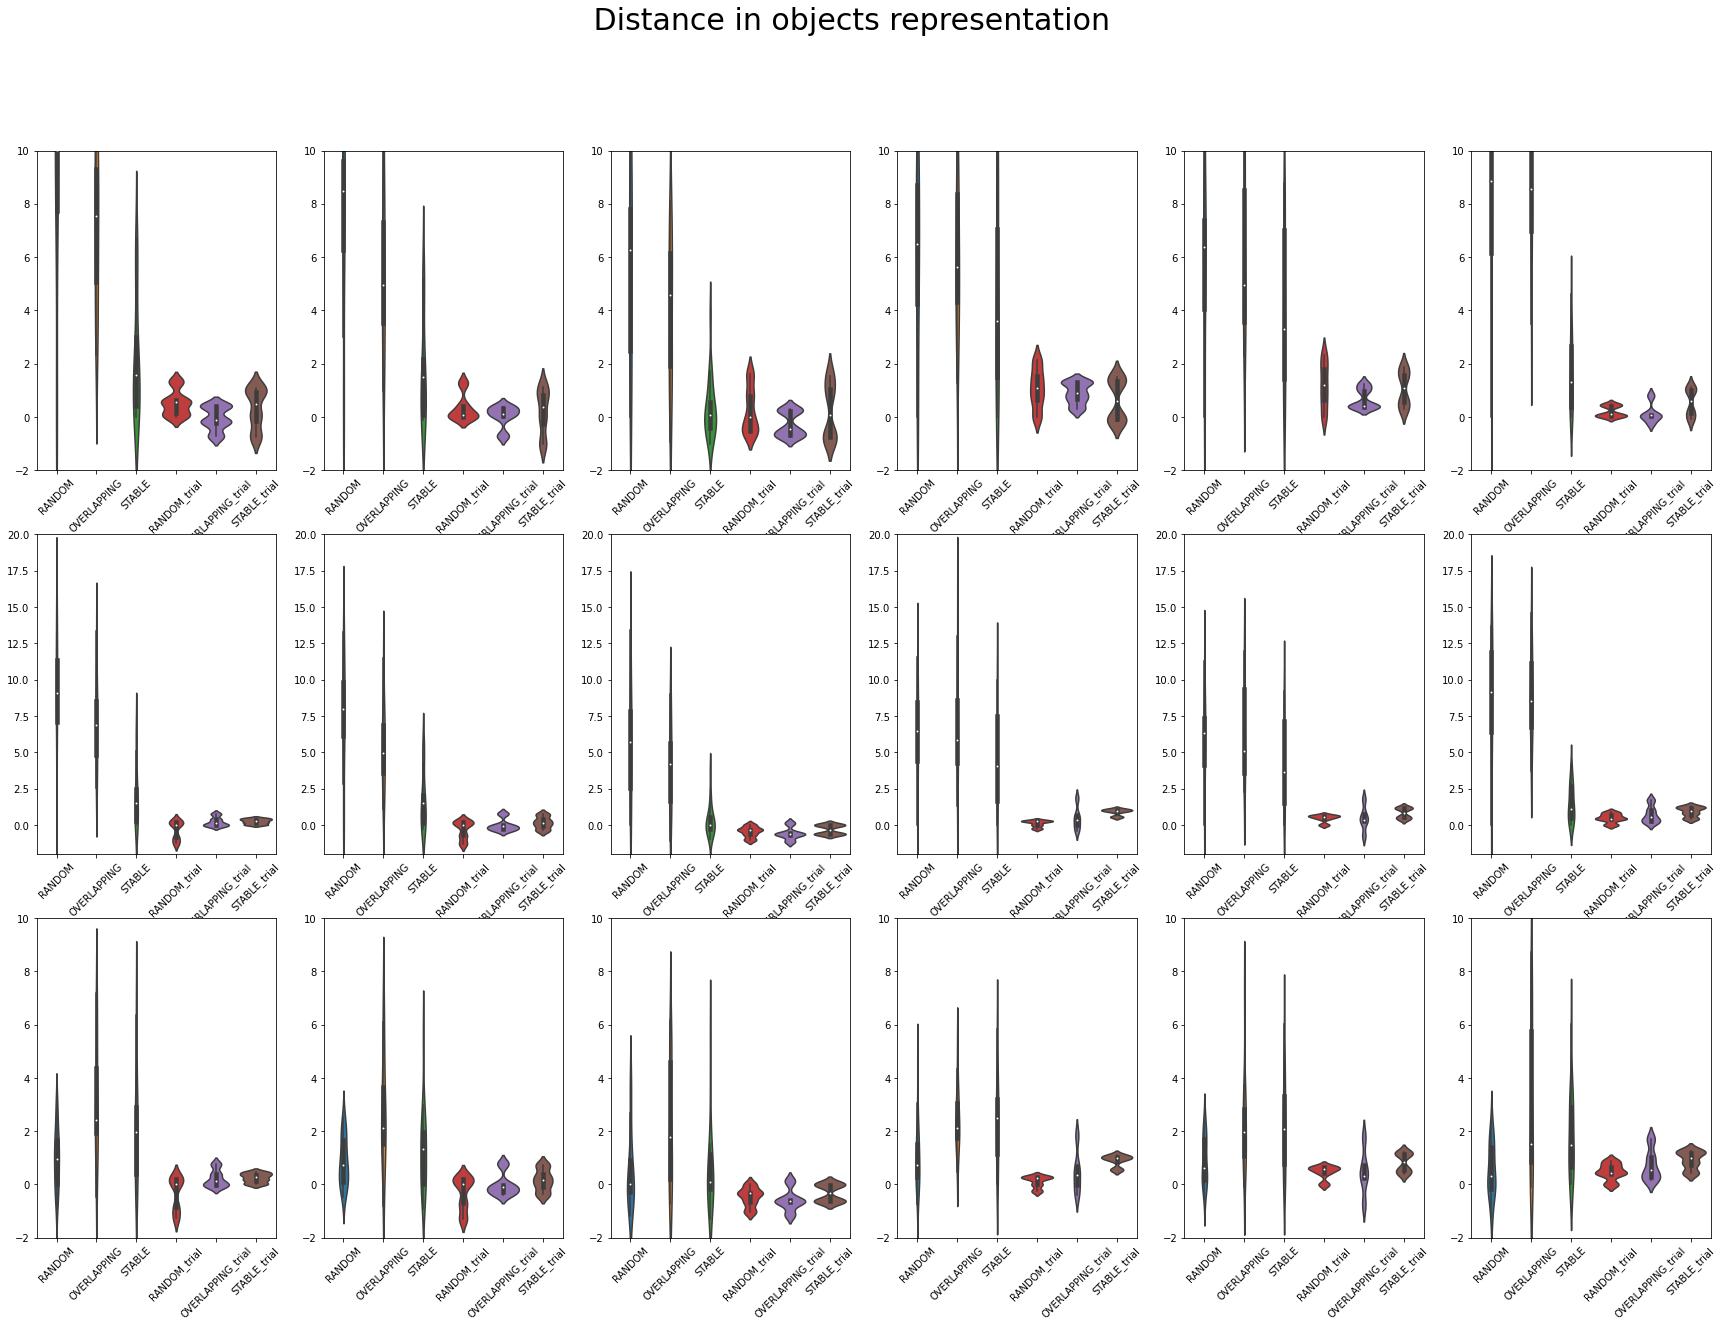

In [29]:
figure = plt.figure()
gs = plt.GridSpec(3,6)
label1 = ['RANDOM','OVERLAPPING','STABLE','RANDOM_trial','OVERLAPPING_trial','STABLE_trial']
label2 = ['RANDOM','OVERLAPPING','STABLE']

for i in range(6):
    ax1 = figure.add_subplot(gs[0,i])
    ax1 = sns.violinplot(data = [random_list1[i],overlapping_list1[i],stable_list1[i],
                              random_list1_trial[i],overlapping_list1_trial[i],stable_list1_trial[i]], orient = 'v')
    # ax1 = sns.swarmplot(data=[random_list1[i],overlapping_list1[i],stable_list1[i],
    #                           random_list1_trial[i],overlapping_list1_trial[i],stable_list1_trial[i]], color=".25", alpha = 0.2)
    ax1.set_xticklabels(label1)
    ax1.set_xticklabels(label1)
    ax1.set_ylim([-2,10])
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    
    
    ax1 = figure.add_subplot(gs[1,i])
    ax1 = sns.violinplot(data = [random_list2[i],overlapping_list2[i],stable_list2[i],
                            random_list2_trial[i],overlapping_list2_trial[i],stable_list2_trial[i]], orient = 'v')
    # ax1 = sns.swarmplot(data=[random_list2[i],overlapping_list2[i],stable_list2[i],
    #                           random_list2_trial[i],overlapping_list2_trial[i],stable_list2_trial[i]], color=".25", alpha = 0.2)
    ax1.set_xticklabels(label1)
    ax1.set_ylim([-2,20])
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
        
    ax1 = figure.add_subplot(gs[2,i])
    ax1 = sns.violinplot(data = [random_list3[i],overlapping_list3[i],stable_list3[i],
                            random_list2_trial[i],overlapping_list2_trial[i],stable_list2_trial[i]], orient = 'v')
    # ax1 = sns.swarmplot(data=[random_list3[i],overlapping_list3[i],stable_list3[i],
    #                         random_list2_trial[i],overlapping_list2_trial[i],stable_list2_trial[i]], color=".25", alpha = 0.2)
    ax1.set_xticklabels(label1)
    ax1.set_ylim([-2,10])
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    
figure.set_size_inches([30,20])
figure.suptitle(' Distance in objects representation', fontsize = 30)
figure_name = figure_path + 'mean_representational_distance_bars_original.png'
figure.patch.set_facecolor('white')

figure.savefig(figure_name)

In [30]:
len(random_list1_trial)

6

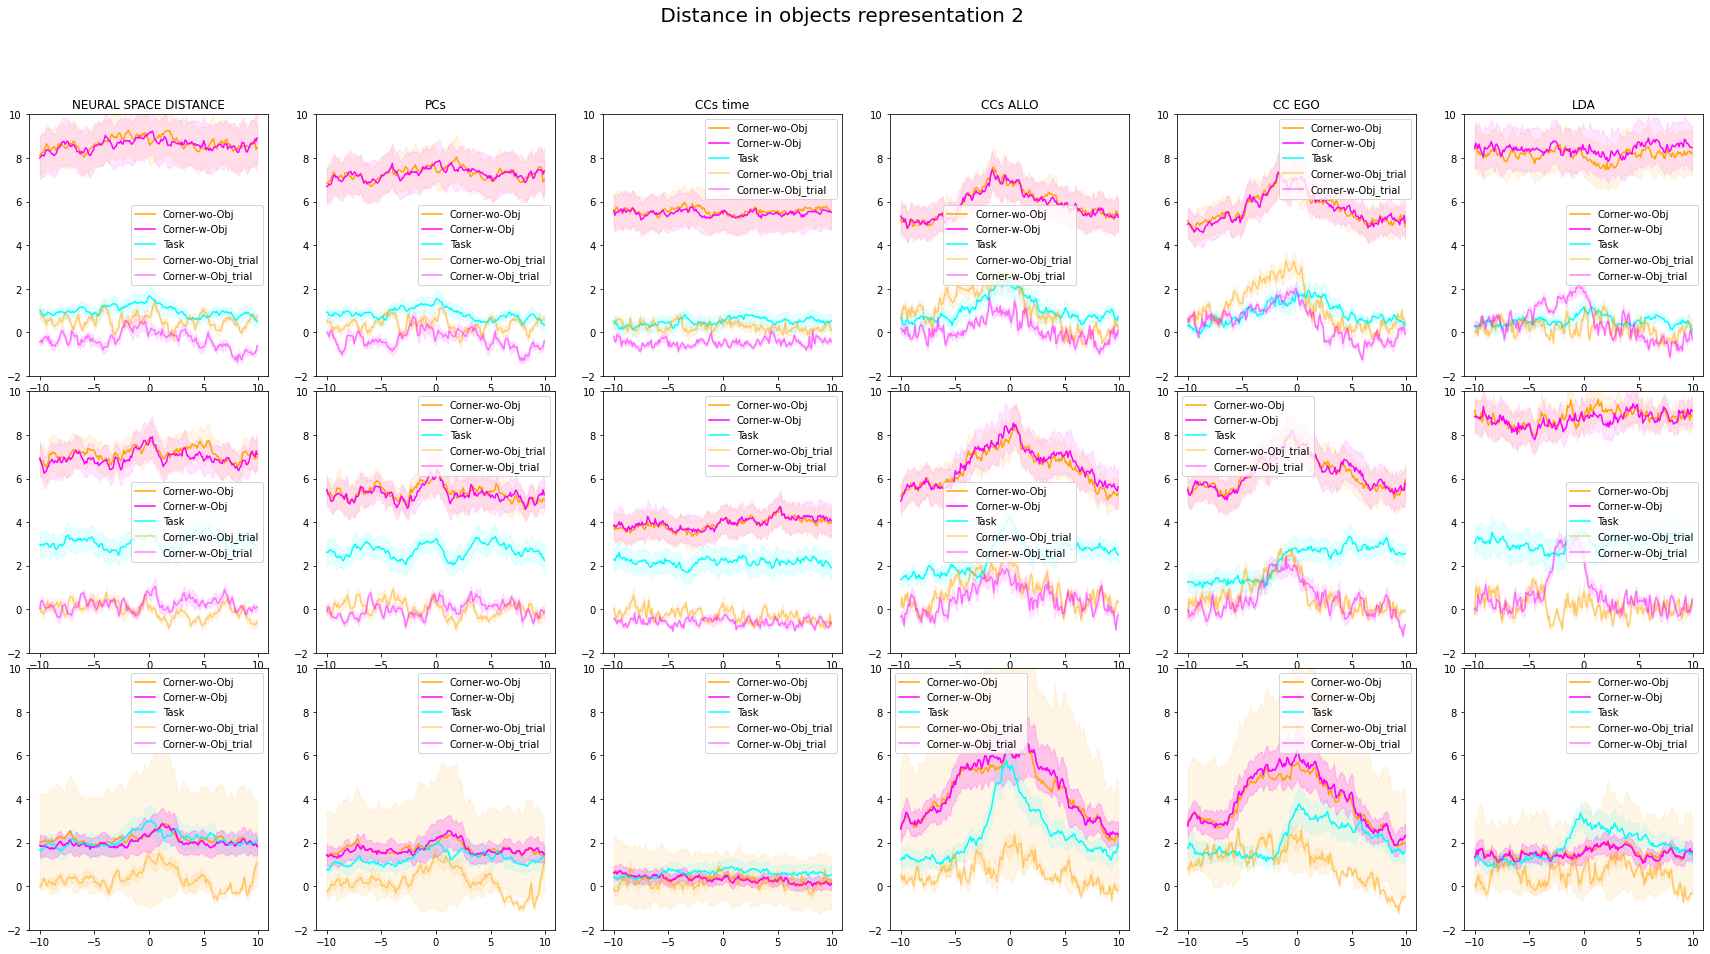

In [31]:
figure = plt.figure()
gs = plt.GridSpec(9,6)
label = ['RANDOM','OVERLAPPING','STABLE']

time = np.arange(-100,100)/10

### neural

titles = ['NEURAL SPACE DISTANCE', 'PCs', 'CCs time','CCs ALLO','CC EGO', 'LDA']


new_legends = ['Corner-wo-Obj','Corner-w-Obj','Task','Corner-wo-Obj_trial','Corner-w-Obj_trial']#,'Task_trial']
for i in range(6):

    ax0 = figure.add_subplot(gs[0:3,i])
    ax0.set_ylim([-2,10])
    ax0.set_title(titles[i])
    random_mean = np.nanmean(random_list_corners,0)[i,:]
    random_std =  np.nanstd(random_list_corners,0)[i,:]/np.sqrt(len(random_list_corners))
    ax0.plot(time,random_mean,'orange')
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'orange', facecolor = 'orange')
    random_mean = np.nanmean(random_list_object_corners,0)[i,:]
    random_std =  np.nanstd(random_list_object_corners,0)[i,:]/np.sqrt(len(random_list_object_corners))
    ax0.plot(time,random_mean,'magenta')
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'magenta', facecolor = 'magenta')
    random_mean = np.nanmean(random_list_task,0)[i,:]
    random_std =  np.nanstd(random_list_task,0)[i,:]/np.sqrt(len(random_list_task))
    ax0.plot(time,random_mean,'cyan')
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'cyan', facecolor = 'cyan')
    
    
    random_mean = np.nanmean(random_list_corners_trial,0)[i,:]
    random_std =  np.nanstd(random_list_corners_trial,0)[i,:]/np.sqrt(len(random_list_corners))
    ax0.plot(time,random_mean,'orange', alpha = 0.5)
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'orange', facecolor = 'orange')
    random_mean = np.nanmean(random_list_object_corners_trial,0)[i,:]
    random_std =  np.nanstd(random_list_object_corners_trial,0)[i,:]/np.sqrt(len(random_list_object_corners))
    ax0.plot(time,random_mean,'magenta',alpha = 0.5)
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'magenta', facecolor = 'magenta')
    #random_mean = np.nanmean(random_list_task[i],0)
    #random_std =  np.nanstd(random_list_task[i],0)#/np.sqrt(len(random_list_task[i]))
    #ax0.plot(time,random_mean,'cyan')
    #ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'cyan', facecolor = 'cyan')
    ax0.legend(new_legends)
   
    
    ax0 = figure.add_subplot(gs[3:6,i])
    ax0.set_ylim([-2,10])
    random_mean = np.nanmean(overlapping_list_corners,0)[i,:]
    random_std =  np.nanstd(overlapping_list_corners,0)[i,:]/np.sqrt(len(overlapping_list_corners))
    ax0.plot(time,random_mean,'orange')
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'orange', facecolor = 'orange')
    random_mean = np.nanmean(overlapping_list_object_corners,0)[i,:]
    random_std =  np.nanstd(overlapping_list_object_corners,0)[i,:]/np.sqrt(len(overlapping_list_object_corners))
    ax0.plot(time,random_mean,'magenta')
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'magenta', facecolor = 'magenta')   
    random_mean = np.nanmean(overlapping_list_task,0)[i,:]
    random_std =  np.nanstd(overlapping_list_task,0)[i,:]/np.sqrt(len(overlapping_list_task))
    ax0.plot(time,random_mean,'cyan')
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'cyan', facecolor = 'cyan')
    
    random_mean = np.nanmean(overlapping_list_corners_trial,0)[i,:]
    random_std =  np.nanstd(overlapping_list_corners_trial,0)[i,:]/np.sqrt(len(overlapping_list_corners))
    ax0.plot(time,random_mean,'orange',alpha = 0.5)
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'orange', facecolor = 'orange')
    random_mean = np.nanmean(overlapping_list_object_corners_trial,0)[i,:]
    random_std =  np.nanstd(overlapping_list_object_corners_trial,0)[i,:]/np.sqrt(len(overlapping_list_object_corners))
    ax0.plot(time,random_mean,'magenta',alpha = 0.5)
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'magenta', facecolor = 'magenta')   
    # random_mean = np.nanmean(overlapping_list_task[i],0)
    # random_std =  np.nanstd(overlapping_list_task[i],0)#/np.sqrt(len(overlapping_list_task[i]))
    # ax0.plot(time,random_mean,'cyan')
    # ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'cyan', facecolor = 'cyan')
    ax0.legend(new_legends)
    
    ax0 = figure.add_subplot(gs[6:9,i])
    ax0.set_ylim([-2,10])
    random_mean = np.nanmean(stable_list_corners,0)[i,:]
    random_std =  np.nanstd(stable_list_corners,0)[i,:]#/np.sqrt(len(stable_list_corners[i]))
    ax0.plot(time,random_mean,'orange')
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'orange', facecolor = 'orange')
    random_mean = np.nanmean(stable_list_object_corners,0)[i,:]
    random_std =  np.nanstd(stable_list_object_corners,0)[i,:]/np.sqrt(len(stable_list_object_corners))
    ax0.plot(time,random_mean,'magenta')
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'magenta', facecolor = 'magenta')   
    random_mean = np.nanmean(stable_list_task,0)[i,:]
    random_std =  np.nanstd(stable_list_task,0)[i,:]/np.sqrt(len(stable_list_task))
    ax0.plot(time,random_mean,'cyan')
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'cyan', facecolor = 'cyan')
    
    random_mean = np.nanmean(stable_list_corners_trial,0)[i,:]
    random_std =  np.nanstd(stable_list_corners_trial,0)[i,:]/np.sqrt(len(stable_list_corners))
    ax0.plot(time,random_mean,'orange',alpha = 0.5)
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'orange', facecolor = 'orange')
    random_mean = np.nanmean(stable_list_object_corners,0)[i,:]
    random_std =  np.nanstd(stable_list_object_corners,0)[i,:]/np.sqrt(len(stable_list_object_corners))
    ax0.plot(time,random_mean,'magenta',alpha = 0.5)
    ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'magenta', facecolor = 'magenta')   
#     random_mean = np.nanmean(stable_list_task[i],0)
#     random_std =  np.nanstd(stable_list_task[i],0)#/np.sqrt(len(stable_list_task[i]))
#     ax0.plot(time,random_mean,'cyan')
#     ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'cyan', facecolor = 'cyan')
        
    
    ax0.legend(new_legends)
    
    
figure.set_size_inches([30,15])

figure.suptitle(' Distance in objects representation 2', fontsize = 20)
figure_name = figure_path + 'mean_representational_distance_2.png'
figure.patch.set_facecolor('white')

figure.savefig(figure_name)

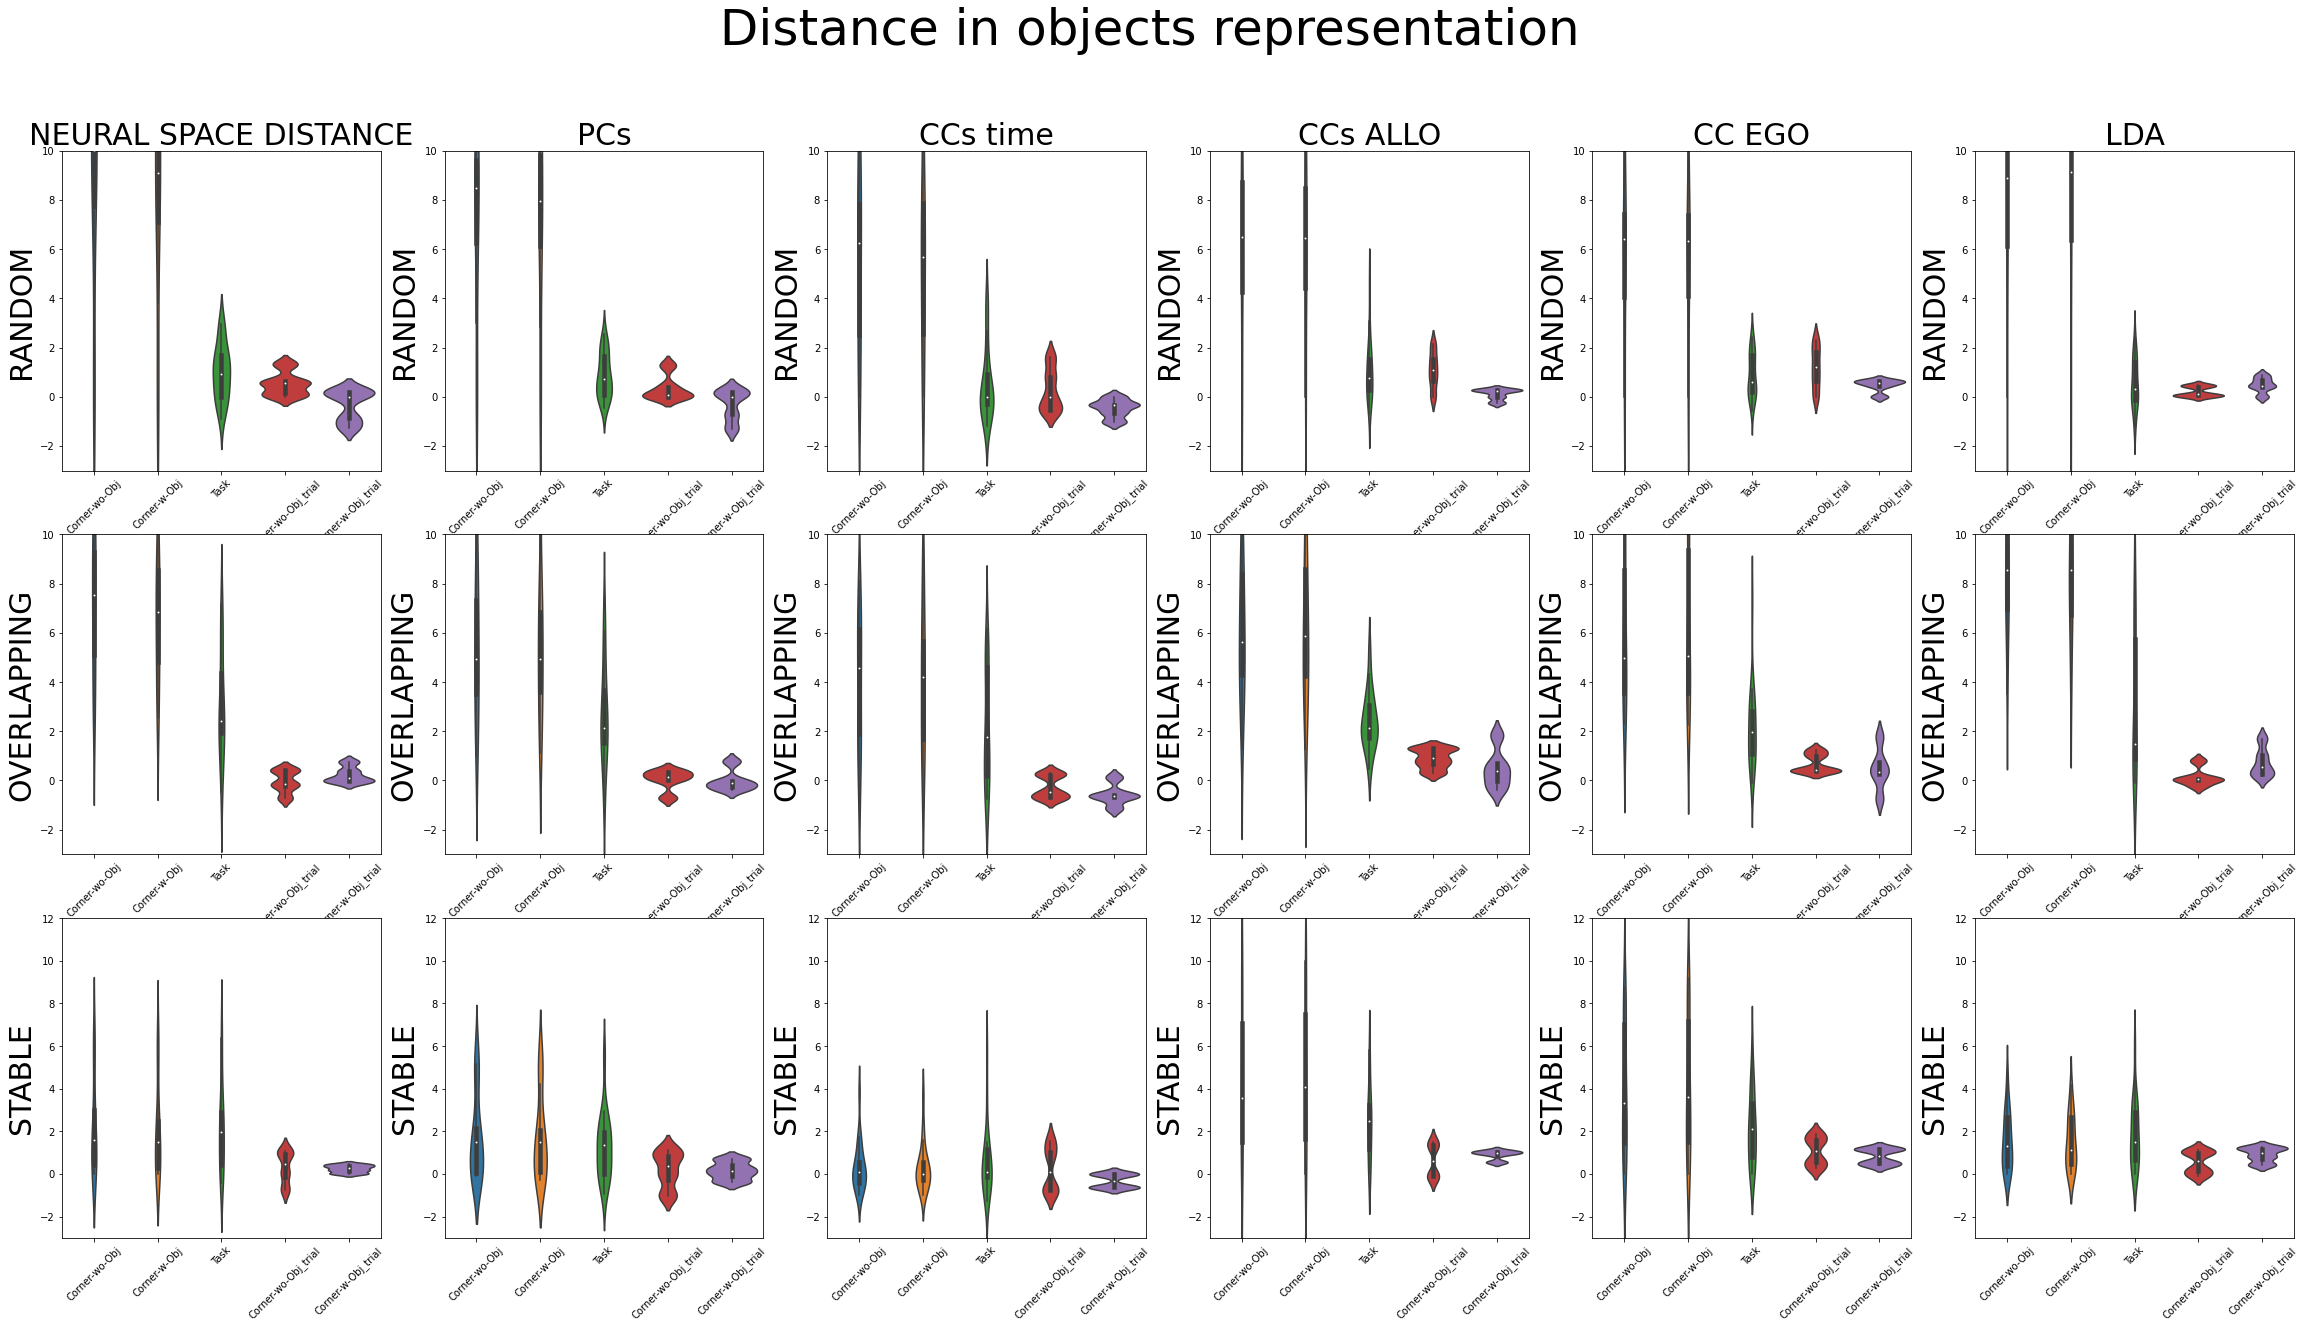

In [ ]:
figure = plt.figure()
gs = plt.GridSpec(3,6)
#label1 = ['RANDOM','OVERLAPPING','STABLE','RANDOM_trial','OVERLAPPING_trial','STABLE_trial']
#label2 = ['RANDOM','OVERLAPPING','STABLE']
label1 = ['Corner-wo-Obj','Corner-w-Obj','Task','Corner-wo-Obj_trial','Corner-w-Obj_trial']#,'Task_trial']

for i in range(6):
    ax1 = figure.add_subplot(gs[0,i])
    ax1 = sns.violinplot(data = [random_list1[i],random_list2[i],random_list3[i],
                              random_list1_trial[i],random_list2_trial[i]], orient = 'v')
    # ax1 = sns.swarmplot(data=[random_list1[i],random_list2[i],random_list3[i],
    #                           random_list1_trial[i],random_list2_trial[i]], color=".25", alpha = 0.2)
    ax1.set_xticklabels(label1)
    ax1.set_xticklabels(label1)
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    ax1.set_ylabel('RANDOM', fontsize = 30)
    ax1.set_title(titles[i],fontsize = 30)
    ax1.set_ylim([-3,10])
    
    ax1 = figure.add_subplot(gs[1,i])
    ax1 = sns.violinplot(data = [overlapping_list1[i],overlapping_list2[i],overlapping_list3[i],
                            overlapping_list1_trial[i],overlapping_list2_trial[i]], orient = 'v')
    # ax1 = sns.swarmplot(data=[overlapping_list1[i],overlapping_list2[i],overlapping_list3[i],
    #                         overlapping_list1_trial[i],overlapping_list2_trial[i]], color=".25", alpha = 0.2)
    ax1.set_xticklabels(label1)
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    ax1.set_ylabel('OVERLAPPING', fontsize = 30)
    ax1.set_ylim([-3,10])
       
    ax1 = figure.add_subplot(gs[2,i])
    ax1 = sns.violinplot(data = [stable_list1[i],stable_list2[i],stable_list3[i],
                            stable_list1_trial[i],stable_list2_trial[i]], orient = 'v')
    # ax1 = sns.swarmplot(data=[stable_list1[i],stable_list2[i],stable_list3[i],
    #                         stable_list1_trial[i],stable_list2_trial[i]],  color=".25", alpha = 0.2)
    ax1.set_xticklabels(label1)
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    ax1.set_ylabel('STABLE', fontsize = 30)
    ax1.set_ylim([-3,12])
   
figure.set_size_inches([40,20])
figure.suptitle(' Distance in objects representation', fontsize = 50)
figure_name = figure_path + 'mean_representational_distance_bars2.png'
figure.patch.set_facecolor('white')

figure.savefig(figure_name)

(20, 6)